In [1]:
%reset -f

# Datos de Clorofila y Basemap

In [2]:
import numpy as np
import netCDF4 as nc # DESDE ANACONDA

In [3]:
data=nc.Dataset('c3s_obs-oc_glo_bgc-plankton_my_l4-multi-4km_P1M_1687400885900.nc')

In [4]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    contact: email: support@brockmann-consult.de
    Naming_authority: CMEMS
    start_time: 00:00:00 UTC
    stop_time: 23:59:59 UTC
    Conventions: CF-1.7
    FROM_ORIGINAL_FILE__Metadata_Conventions: Unidata Dataset Discovery v1.0
    netcdf_file_type: NETCDF4_CLASSIC
    Netcdf_version_id: V4
    project: Copernicus Marine (CMEMS)
    references: http://marine.copernicus.eu
    institution: Brockmann Consult GmbH, operating as a production unit within the CMEMS OCTAC
    distribution_statement: Copernicus Marine data license (see website)
    cmems_production_unit: OC-BC-HAMBURG-GE
    citation: The licensees should respect the Copernicus Marine usage agreement (http://marine.copernicus.eu/services-portfolio/service-commitments-and-licence/) by crediting Copernicus in a manner similar to:  <Generated using E.U. Copernicus Marine Service Information, provided by OCTAC/BC production cent

In [7]:
chl3d=np.array(data.variables['CHL'][:])
lon=np.array(data.variables['longitude'][:])
lat=np.array(data.variables['latitude'][:])

In [6]:
chl3d.shape

(156, 73, 145)

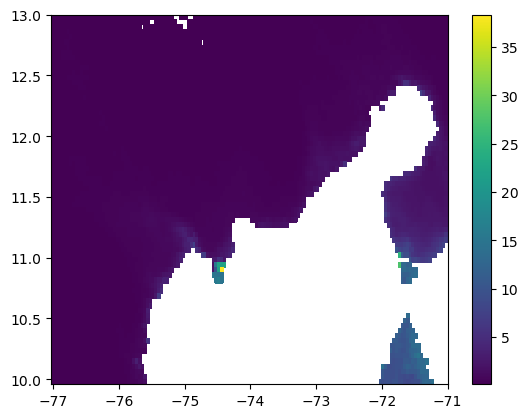

In [13]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.pcolor(lon,lat,chl3d[-1,:,:])
plt.colorbar()

In [10]:
data.variables['CHL']

<class 'netCDF4._netCDF4.Variable'>
float32 CHL(time, latitude, longitude)
    _FillValue: -999.0
    long_name: Chlorophyll-a concentration in seawater (not log-transformed), generated by as a blended combination of OCI, OCI2, OC2 and OCx algorithms, depending on water class memberships
    standard_name: mass_concentration_of_chlorophyll_a_in_sea_water
    source: Sentinel-3a,Sentinel-3b-OLCIa,OLCIb
    type: surface
    units: milligram m-3
    units_nonstandard: mg m^-3
    missing_value: -999.0
    _ChunkSizes: [   1 1440 2880]
unlimited dimensions: 
current shape = (156, 73, 145)
filling on

In [11]:
chl3d[chl3d==-999.0]=np.nan

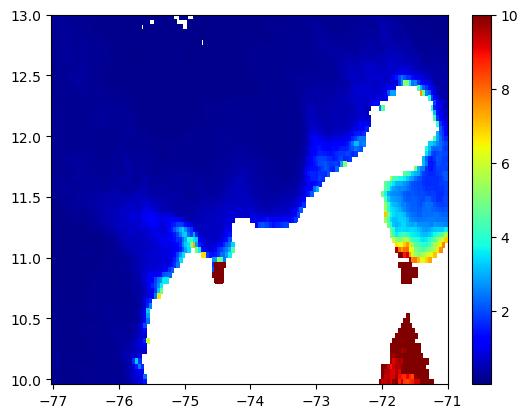

In [16]:
plt.figure(2)

plt.pcolor(lon,lat,chl3d[-1,:,:],vmin=0.01, vmax=10,shading='auto',cmap=plt.cm.jet)
plt.colorbar()

In [17]:
time=np.float64(data.variables['time'][:]);time2=np.array(time)

In [18]:
data.variables['time']

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: seconds since 1970-01-01
    calendar: proleptic_gregorian
    _CoordinateAxisType: Time
    valid_min: 1262304000
    valid_max: 1669852800
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: 
current shape = (156,)
filling on, default _FillValue of -2147483647 used

In [21]:
def timeSatelite(yi,mi,di,timeSat):
    from datetime import datetime, timedelta
    import numpy as np
    d0 = datetime(yi,mi,di,0,0,0)
    ######################################
    year=np.zeros(len(timeSat))
    month=np.zeros(len(timeSat))
    day=np.zeros(len(timeSat))
    ######################################
    for i in range(0,len(timeSat)):
        dt = timedelta(seconds = timeSat[i])  
        # dt = timedelta(hours = timeSat[i])   
        #dt = timedelta(days = timeSat[i])   
        
        d  = d0 + dt 
        vect=d.timetuple()
        year[i]=vect[0]   
        month[i]=vect[1]
        day[i]=vect[2]
    return year,month,day

In [22]:
yyyy,mm,dd=timeSatelite(1970,1,1,time2)

In [34]:
MIN=np.nanmin(chl3d[-1,:,:])
MAX=np.nanmax(chl3d[-1,:,:])

In [35]:
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm

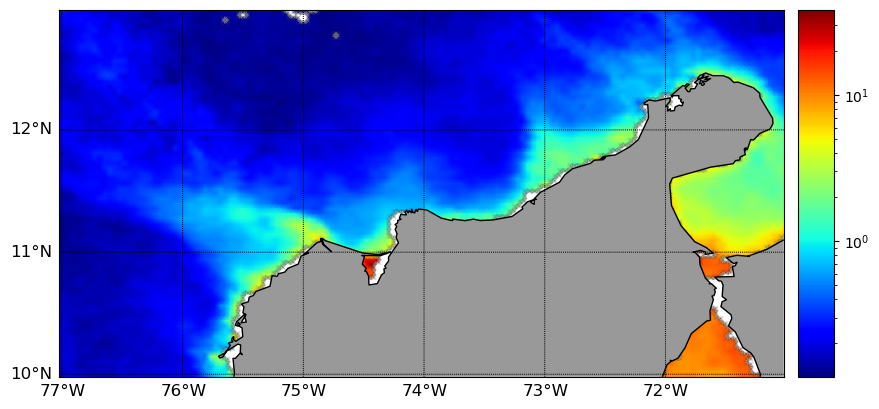

In [38]:
fig, axes=plt.subplots(figsize=(10,10))

m=Basemap(projection='mill',lat_ts=15,llcrnrlon=lon.min(), \
          urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
          resolution='i')

m.drawcoastlines()

x,y=m(*np.meshgrid(lon,lat))

m.pcolormesh(x,y,chl3d[-1,:,:],shading='gouraud',norm=LogNorm(vmin=MIN,vmax=MAX),cmap=plt.cm.jet)
m.fillcontinents(color='0.6')

m.drawparallels(np.arange(10,13,1),labels=[1,0,0,0],linewidth=0.7,fontsize=12)
m.drawmeridians(np.arange(-77,-71,1),labels=[0,0,0,1],linewidth=0.7,fontsize=12)


m.colorbar()

plt.show()
